In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

c:\Users\mape3\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)


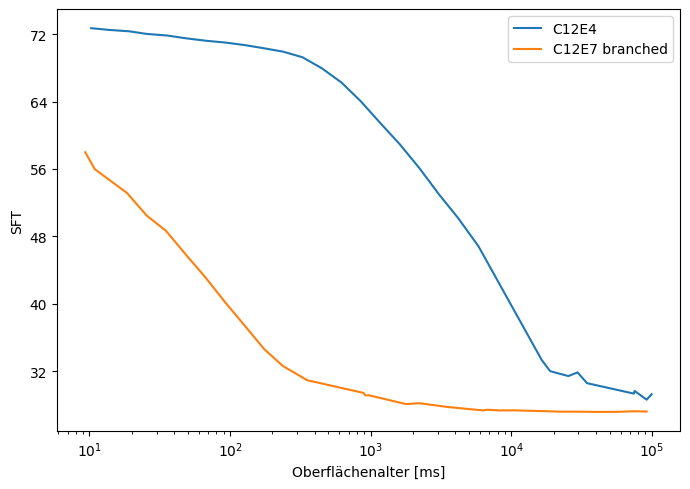

In [2]:
df=pd.read_csv("Example Data/C12E4_0.1g.txt", delimiter="\t", header=1, skiprows=[2])
age=df["Oberflächenalter [ms].10"]
sft=df["SFT"]
df1=pd.read_csv("Example Data/C12E7_branched_0.1gL.txt", delimiter="\t", header=1, skiprows=[2])
age1=df1["Oberflächenalter [ms].10"]
sft1=df1["SFT"]

def to_float(series):
    return pd.to_numeric(series.str.replace(',', '.', regex=False), errors='coerce')

# Prepare and sort first dataset
age_num_clean = to_float(age)
sft_num_clean = to_float(sft)
sorted_idx = np.argsort(age_num_clean)
age_num_sorted = age_num_clean.iloc[sorted_idx].reset_index(drop=True)
sft_num_sorted = sft_num_clean.iloc[sorted_idx].reset_index(drop=True)

# Prepare and sort second dataset
age_num1_clean = to_float(age1)
sft_num1_clean = to_float(sft1)
sorted_idx1 = np.argsort(age_num1_clean)
age_num1_sorted = age_num1_clean.iloc[sorted_idx1].reset_index(drop=True)
sft_num1_sorted = sft_num1_clean.iloc[sorted_idx1].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(age_num_sorted, sft_num_sorted, label='C12E4')
ax.plot(age_num1_sorted, sft_num1_sorted, label='C12E7 branched')

ax.set_xscale("log")
ax.set_xlabel("Oberflächenalter [ms]")
ax.set_ylabel("SFT")
ax.legend()

# Reduce number of ticks
#ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.yaxis.set_major_locator(plt.MaxNLocator(8))

plt.tight_layout()
plt.show()


c:\Users\mape3\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)


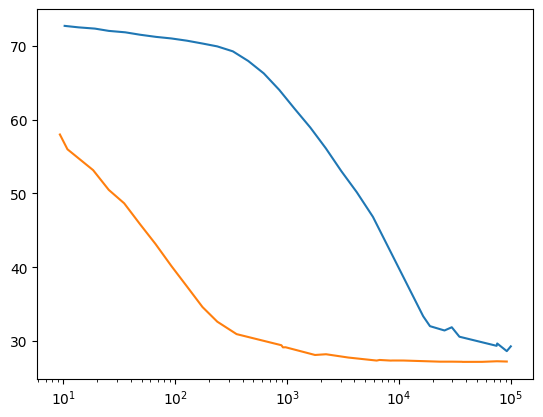

In [10]:
def read_data(file_path, delimiter="\t", header=1, skiprows=[2]):
    df = pd.read_csv(file_path, delimiter=delimiter, header=header, skiprows=skiprows)
    # Select the second last and last columns for age and sft
    age = df.iloc[:, -2]
    sft = df.iloc[:, -1]
    age_num_clean = to_float(age)
    sft_num_clean = to_float(sft)
    sorted_idx = np.argsort(age_num_clean)
    age_num_sorted = age_num_clean.iloc[sorted_idx].reset_index(drop=True)
    sft_num_sorted = sft_num_clean.iloc[sorted_idx].reset_index(drop=True)
    return age_num_sorted, sft_num_sorted

age, sft = read_data("Example Data/C12E4_0.1g.txt")
age1, sft1 = read_data("Example Data/C12E7_branched_0.1gL.txt")
plt.plot(age, sft, label='C12E4')
plt.plot(age1, sft1, label='C12E7 branched')
plt.xscale("log")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\mape3\AppData\Local\Temp\ipykernel_29960\29360836.py:1: SyntaxWarning: invalid escape sequence '\C'
  cal=pd.read_csv("Example Data\Calibration.txt", delimiter="\t", header=1, skiprows=[2])


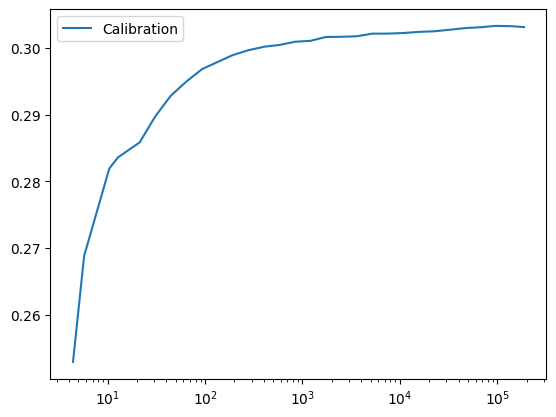

In [ ]:
cal=pd.read_csv("Example Data\Calibration.txt", delimiter="\t", header=1, skiprows=[2])
life=np.array(cal["bubble life time[ms]"])
sft_cal=np.array(cal["SFT"])

plt.plot(life, sft_cal, label='Calibration')
plt.xscale("log")
plt.legend()
plt.show()



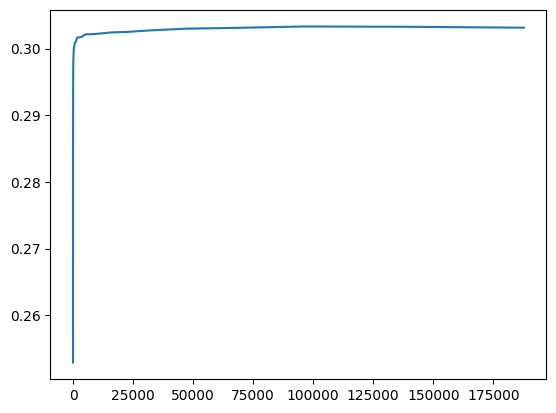

In [28]:
def read_calibration(file_path, delimiter="\t", header=1, skiprows=[2]):
    df = pd.read_csv(file_path, delimiter=delimiter, header=header, skiprows=skiprows)
    life = np.array(df.iloc[:, 0])  # Second column
    sft_cal = np.array(df.iloc[:, 1])  # First column
    return life, sft_cal

life, sft_cal = read_calibration("Example Data/Calibration.txt")
plt.plot(life, sft_cal, label='Calibration')

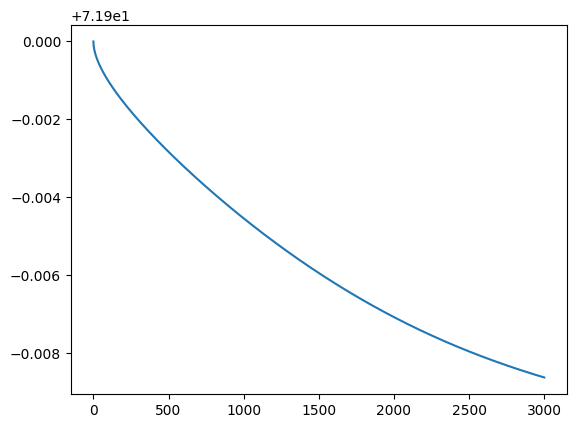

In [3]:
simdata=pd.read_csv("Yang Simulation mymolar.tsv", delimiter="\t")
plt.plot(simdata["time_s"], simdata["dynamic_surface_tension_N_m"], label='Simulation')
#plt.xscale("log")


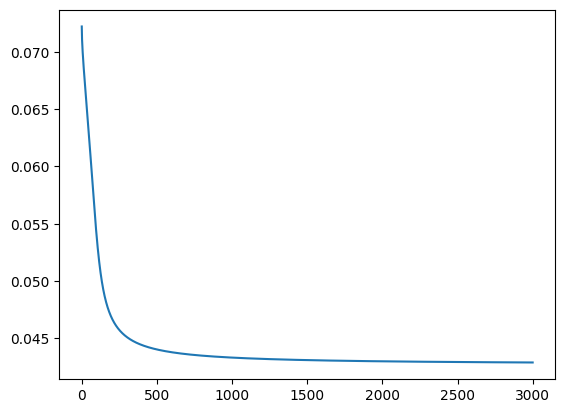

In [6]:
simdata=pd.read_csv("Simulation.tsv", delimiter="\t")
plt.plot(simdata["time_s"], simdata["dynamic_surface_tension_N_m"], label='Simulation')
#plt.xscale("log")

=== Simulation der Adsorption an der Grenzfläche ===

Simulation abgeschlossen.
Endwert γ(T) = 0


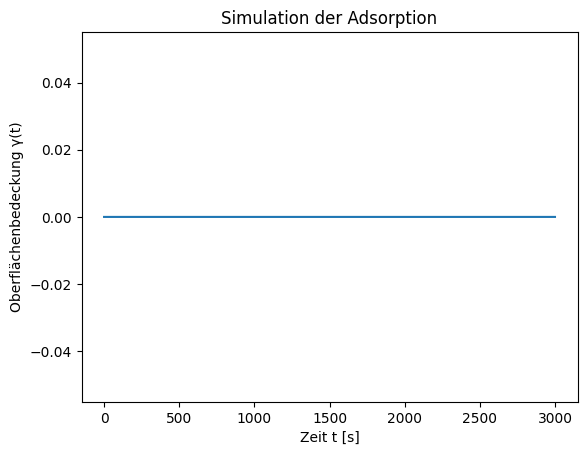

In [34]:
import math
import numpy as np
from dataclasses import dataclass

# Konstanten
PI = math.pi
R = 8.314

# Dataklasse für Modellparameter
@dataclass
class ModelParams:
    cb: float = 0.0
    dif: float = 0.0
    rb: float = 0.0
    Tmpr: float = 298.0
    st0: float = 0.072
    gamma_m: float = 0.0
    kh: float = 0.0
    kl: float = 0.0
    kf: float = 0.0
    A: float = 0.0
    nn: float = 1.0
    kfl: float = 0.0
    knl: float = 0.0
    kv: float = 0.0
    T: float = 3000.0
    h: float = 1.0
    err: float = 1e-30
    M: int = 100
    isotherm: int = 1
    geometry: int = 0


# --- Isotherm-Modelle (wie in deinem Code) ---

def hr(gamma, p): return gamma / p.kh if p.kh != 0 else float("inf")
def lm(gamma, p): return (1/p.kl)*(gamma/(p.gamma_m-gamma)) if p.kl != 0 and p.gamma_m != gamma else float("inf")
def fk(gamma, p): 
    if p.kf == 0 or p.gamma_m == 0 or gamma >= p.gamma_m: return float("inf")
    return (1/p.kf)*(gamma/(p.gamma_m-gamma))*math.exp(-p.A*(gamma/p.gamma_m))
def fl_(gamma, p): 
    if p.kfl == 0: return float("inf")
    return (gamma/p.kfl)**p.knl
def vm(gamma, p):
    if p.kv == 0 or p.gamma_m == gamma: return float("inf")
    frac = gamma / (p.gamma_m - gamma)
    return p.kv * frac * math.exp(frac)

def g_term(t, p):
    if p.geometry == 0:
        return (2*math.sqrt(t*p.dif/PI) + (p.dif/p.rb)*t) * p.cb if p.rb != 0 else float("inf")
    elif p.geometry == 1:
        return math.sqrt(p.dif/PI) * 2*p.cb*math.sqrt(t)
    else:
        raise ValueError("Geometry must be 0 or 1")

def K(t, tau, gamma, p):
    if t <= tau: return 0.0
    sqrt_term = math.sqrt(p.dif / PI) / math.sqrt(t - tau)
    add_spherical = p.dif / p.rb if (p.geometry == 0 and p.rb != 0.0) else 0.0
    factor = -(sqrt_term + add_spherical) if p.geometry == 0 else -sqrt_term
    iso_funcs = [hr, lm, fk, fl_, vm]
    return factor * iso_funcs[p.isotherm - 1](gamma, p)


# --- Simulation ---
def run_simulation():
    print("=== Simulation der Adsorption an der Grenzfläche ===")

    # Eingabe der Startparameter
    p = ModelParams()
    p.isotherm = int(input("Isotherm-Modell (1=Henry, 2=Langmuir, 3=Frumkin, 4=Freundlich, 5=Volmer): "))
    p.geometry = int(input("Geometrie (0=sphärisch, 1=planar): "))
    p.cb = float(input("Bulk-Konzentration cb [mol/m^3]: "))
    p.dif = float(input("Diffusionskoeffizient D [m^2/s]: "))
    p.rb = float(input("Radius rb (nur sphärisch) [m]: "))
    p.gamma_m = float(input("Maximale Bedeckung γ_m: "))
    p.h = float(input("Zeitschritt h [s]: "))
    p.T = float(input("Endzeit T [s]: "))

    # optionale Parameter
    if p.isotherm in [2, 3]:
        p.kl = float(input("Langmuir-Konstante kl: "))
    if p.isotherm == 3:
        p.A = float(input("Frumkin-Wechselwirkungsparameter A: "))
    if p.isotherm == 4:
        p.kfl = float(input("Freundlich-Konstante kfl: "))
        p.knl = float(input("Exponent knl: "))
    if p.isotherm == 5:
        p.kv = float(input("Volmer-Konstante kv: "))

    # Anfangsbedingungen
    gamma = 0.0
    times = np.arange(0, p.T, p.h)
    gammas = []

    for t in times:
        # einfacher Euler-Schritt (Dummy-Dynamik zur Illustration)
        rate = -K(t, max(0, t - p.h), gamma, p)
        gamma += rate * p.h
        gamma = max(0, min(gamma, p.gamma_m))  # physikalisch sinnvoll beschränken
        gammas.append(gamma)

    print("\nSimulation abgeschlossen.")
    print(f"Endwert γ(T) = {gamma:.6g}")

    # Plot (optional, falls matplotlib verfügbar)
    try:
        import matplotlib.pyplot as plt
        plt.plot(times, gammas)
        plt.xlabel("Zeit t [s]")
        plt.ylabel("Oberflächenbedeckung γ(t)")
        plt.title("Simulation der Adsorption")
        plt.show()
    except ImportError:
        print("Matplotlib nicht installiert, kein Plot erzeugt.")

    return times, gammas


# --- Hauptaufruf ---
if __name__ == "__main__":
    run_simulation()


=== Simulation der Adsorption an der Grenzfläche ===

Simulation abgeschlossen.
Endwert γ(T) = 0


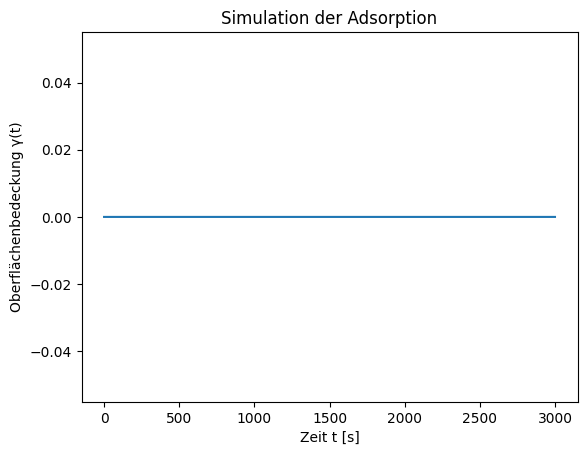

[0.000e+00 1.000e+00 2.000e+00 ... 2.997e+03 2.998e+03 2.999e+03] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
times, gammas= run_simulation()
print(times, gammas)